# Campo de gravidade, Terra Normal e distúrbio de gravidade

Notebook que mostrará o campo de gravidade para o mundo inteiro, bem como o cálculo do efeito gerado pela Terra Normal. Estes cálculos irão servir para interpretarmos como o campo varia geograficamente e, posteriormente, calcularmos o distúrbio de gravidade. 

Este notebook é fortemente inspirado em códigos encontrado no projeto [Fatiando a Terra](https://www.fatiando.org). Este é um projeto que desenvolve bibliotecas em linguagem [Python](https://www.python.org/) voltado para resolver problemas dentro das Geociências para a realização de modelagem e inversão de dados geofísicos. Todos os códigos são abertos e distribuídos gratuitamente. 

## Importando bibliotecas

Importando as bibliotecas que serão utilizadas para manipulação e visualização dos dados de gravidade.

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import boule as bl
import ensaio
import xarray as xr 
import verde as vd

## Carregando os dados do EIGEN-6C4 utilizando a biblioteca Ensaio

Estes dados são do modelo EIGEN-6C4 no [*International Center for Global Earth Models* (ICGEM)](http://icgem.gfz-potsdam.de/home).

In [2]:
fname = ensaio.fetch_earth_gravity(version=1)

In [3]:
observed_gravity = xr.load_dataarray(fname)
observed_gravity

<xarray.DataArray 'gravity' (latitude: 1081, longitude: 2161)>
array([[980106.5 , 980106.5 , 980106.5 , ..., 980106.5 , 980106.5 ,
        980106.5 ],
       [980108.25, 980108.25, 980108.25, ..., 980108.25, 980108.25,
        980108.25],
       [980108.8 , 980108.8 , 980108.8 , ..., 980108.75, 980108.75,
        980108.8 ],
       ...,
       [980153.8 , 980153.75, 980153.6 , ..., 980153.94, 980153.8 ,
        980153.8 ],
       [980160.44, 980160.44, 980160.44, ..., 980160.44, 980160.44,
        980160.44],
       [980157.5 , 980157.5 , 980157.5 , ..., 980157.5 , 980157.5 ,
        980157.5 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.8 180.0
  * latitude   (latitude) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
    height     (latitude, longitude) float32 1e+04 1e+04 1e+04 ... 1e+04 1e+04
Attributes:
    Conventions:     CF-1.8
    title:           Gravity acceleration (EIGEN-6C4) at a constant geometric...
    crs:             WGS84
    source:          Generated from the EIGEN-6C4 model by the ICGEM Calculat...
    license:         Creative Commons Attribution 4.0 International Licence
    references:      https://doi.org/10.5880/icgem.2015.1
    long_name:       gravity acceleration
    description:     magnitude of the gravity acceleration vector (gravitatio...
    units:           mGal
    actual_range:    [974748.6 980201.9]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

## Campo de gravidade para o mundo inteiro

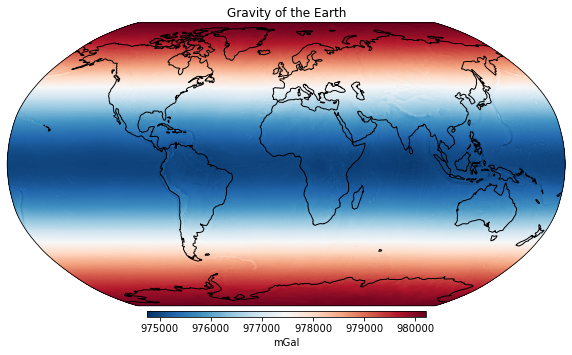

In [4]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())
pc = observed_gravity.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, cmap="RdBu_r"
)
plt.colorbar(
    pc, label="mGal", orientation="horizontal", aspect=50, pad=0.01, shrink=0.5
)
ax.set_title("Gravity of the Earth")
ax.coastlines()

file_name = 'images/gravity_earth'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Gravidade Normal 

### World Geodetic System (WGS84)

In [5]:
ellipsoid = bl.WGS84
normal_gravity = ellipsoid.normal_gravity(observed_gravity.latitude, observed_gravity.height)

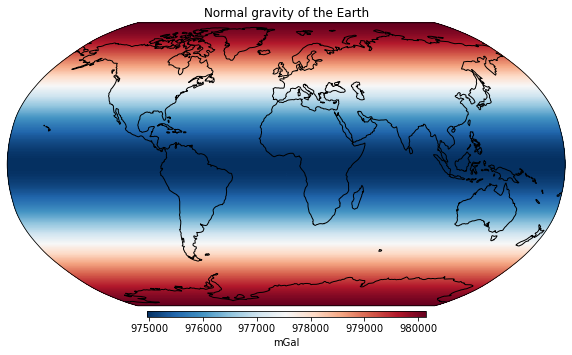

In [6]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())
pc = ax.pcolormesh(
    observed_gravity.longitude,
    observed_gravity.latitude,
    normal_gravity,
    transform=ccrs.PlateCarree(),
    cmap="RdBu_r"
)
plt.colorbar(
    pc, label="mGal", orientation="horizontal", aspect=50, pad=0.01, shrink=0.5
)
ax.set_title("Normal gravity of the Earth")
ax.coastlines()

file_name = 'images/normal_gravity'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Distúrbio de gravidade

In [7]:
gravity_disturbance = observed_gravity - normal_gravity

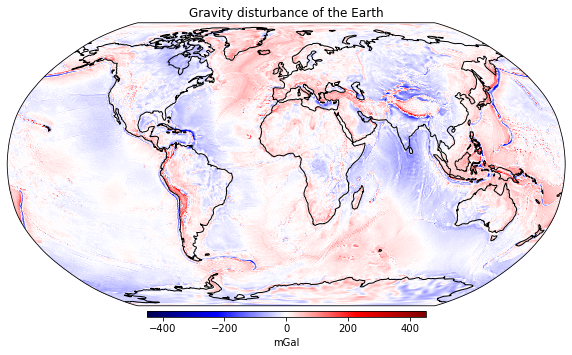

In [8]:
maxabs = vd.maxabs(gravity_disturbance)
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())
pc = gravity_disturbance.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    cmap="seismic",
    vmin=-maxabs,
    vmax=maxabs,
)
plt.colorbar(
    pc, label="mGal", orientation="horizontal", aspect=50, pad=0.01, shrink=0.5
)
ax.set_title("Gravity disturbance of the Earth")
ax.coastlines()
file_name = 'images/gravity_disturbance'
plt.savefig(file_name+'.png',dpi=300)
plt.show()
